# Runtime and cost analysis of Dynamic algorithm versus static algorithms for finding K-center

### Subproblem - Dynamic SSSP in decrmental setting

To ensure the effectiveness of our dynamic K-center algorithm, we begin by evaluating different dynamic single-source-shortest-path (SSSP) algorithms. This comparison allows us to determine the most suitable approach for integration into our oain algorithm.

#### DecrementalDynamicSSSP from paper:
    Deterministic decremental SSSP in almost linear time
#### ES tree from paper:
    An On-Line Edge Deletion Problem
#### Scaled ES tree from paper:
    Faster Approximation Schemes for Fractional Multicommodity Flow Problems via Dynamic Graph Algorithms

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

directory = 'results/short/DecrementalSSSP'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]
dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/DecrementalSSSP/{file}", sep = " "))
    

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

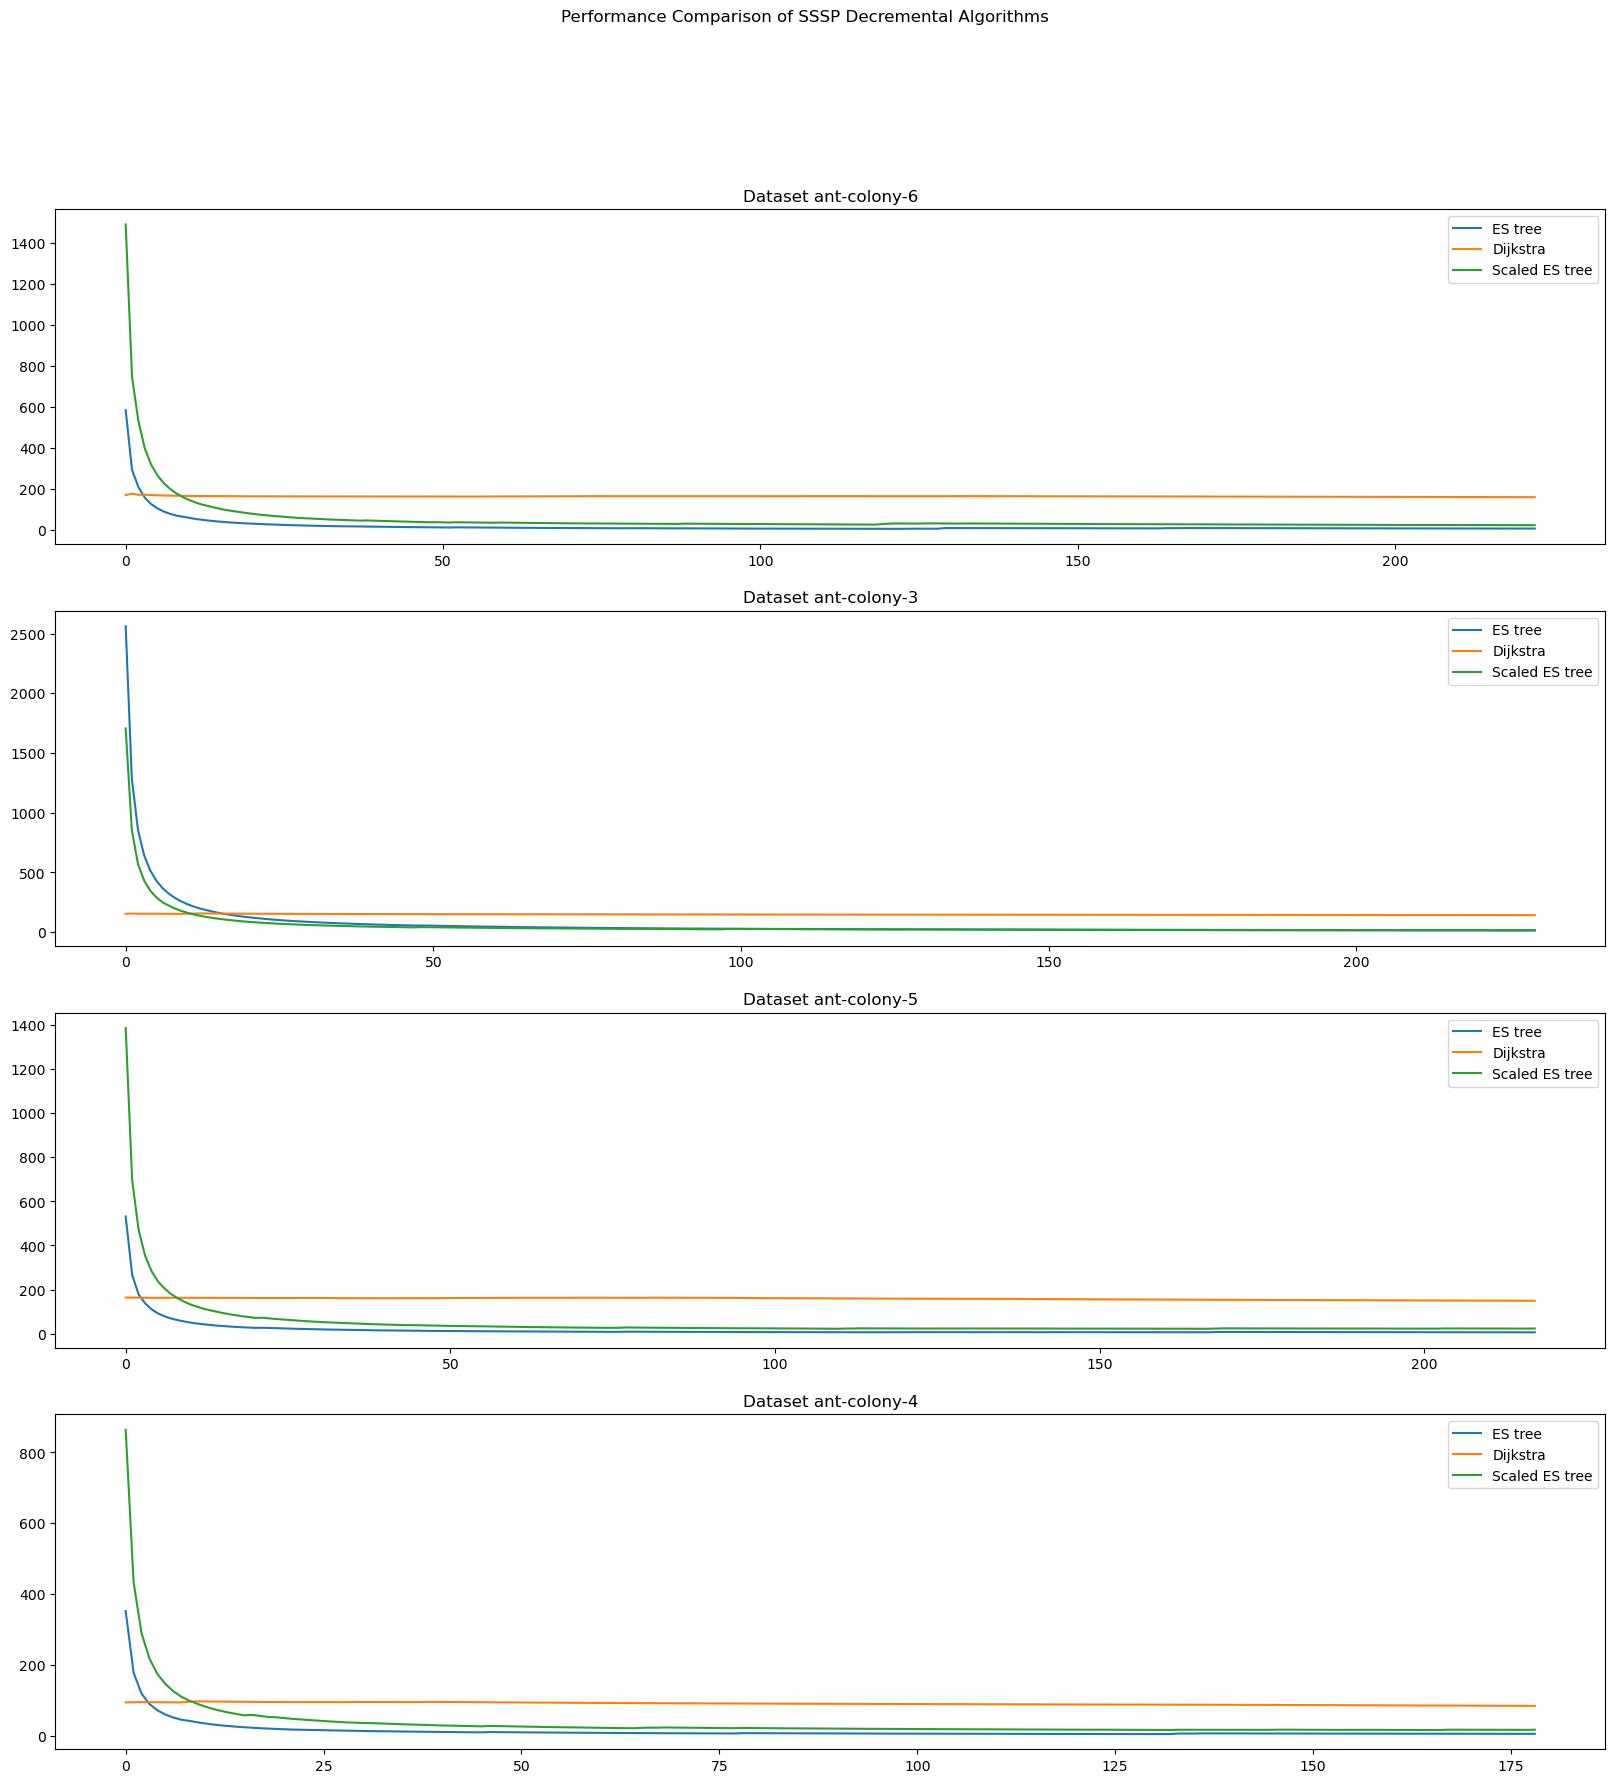

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(dfs), figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_EStree'], label="ES tree")
    axs[i].plot(df['mean_Dijkstra'], label="Dijkstra")
#     axs[i].plot(df['mean_DecrementalDynamicSSSP'], label="Decremental Dynamic SSSP")
    axs[i].plot(df['mean_ScaledEStree'], label="Scaled ES tree")
    axs[i].set_title(f'Dataset {files[i][:12]}')
    axs[i].legend()

fig.suptitle("Performance Comparison of SSSP Decremental Algorithms")
plt.show()

In [3]:
for i, df in enumerate(dfs):
    print('for dataset ', files[i][:12])
    print('EStree ', df['EStree'].mean())
    print('Dijkstra ', df['Dijkstra'].mean())
    print('DecrementalDynamicSSSP ', df['DecrementalDynamicSSSP'].mean())
    print('ScaledEStree', df['ScaledEStree'].mean())

for dataset  ant-colony-6
EStree  7.901345291479821
Dijkstra  160.85650224215246
DecrementalDynamicSSSP  74736.11659192825
ScaledEStree 24.37219730941704
for dataset  ant-colony-3
EStree  12.608695652173912
Dijkstra  142.12173913043478
DecrementalDynamicSSSP  27421.543478260868
ScaledEStree 17.321739130434782
for dataset  ant-colony-5
EStree  6.440366972477064
Dijkstra  149.3348623853211
DecrementalDynamicSSSP  46259.5
ScaledEStree 23.88532110091743
for dataset  ant-colony-4
EStree  5.173184357541899
Dijkstra  84.10614525139665
DecrementalDynamicSSSP  21001.91061452514
ScaledEStree 16.977653631284916


### Subproblem - Dynamic SSSP in Incremental setting

#### IncrementalDynamicSSSP from paper:
    Constructing Light Spanners Deterministically in Near-Linear Time
#### ES tree from paper:
    An On-Line Edge Deletion Problem
#### Dsource from paper:
    Constructing Light Spanners Deterministically in Near-Linear Time

In [4]:
directory = 'results/short/IncrementalSSSP'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalSSSP/{file}", sep = " "))
    
# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)
    

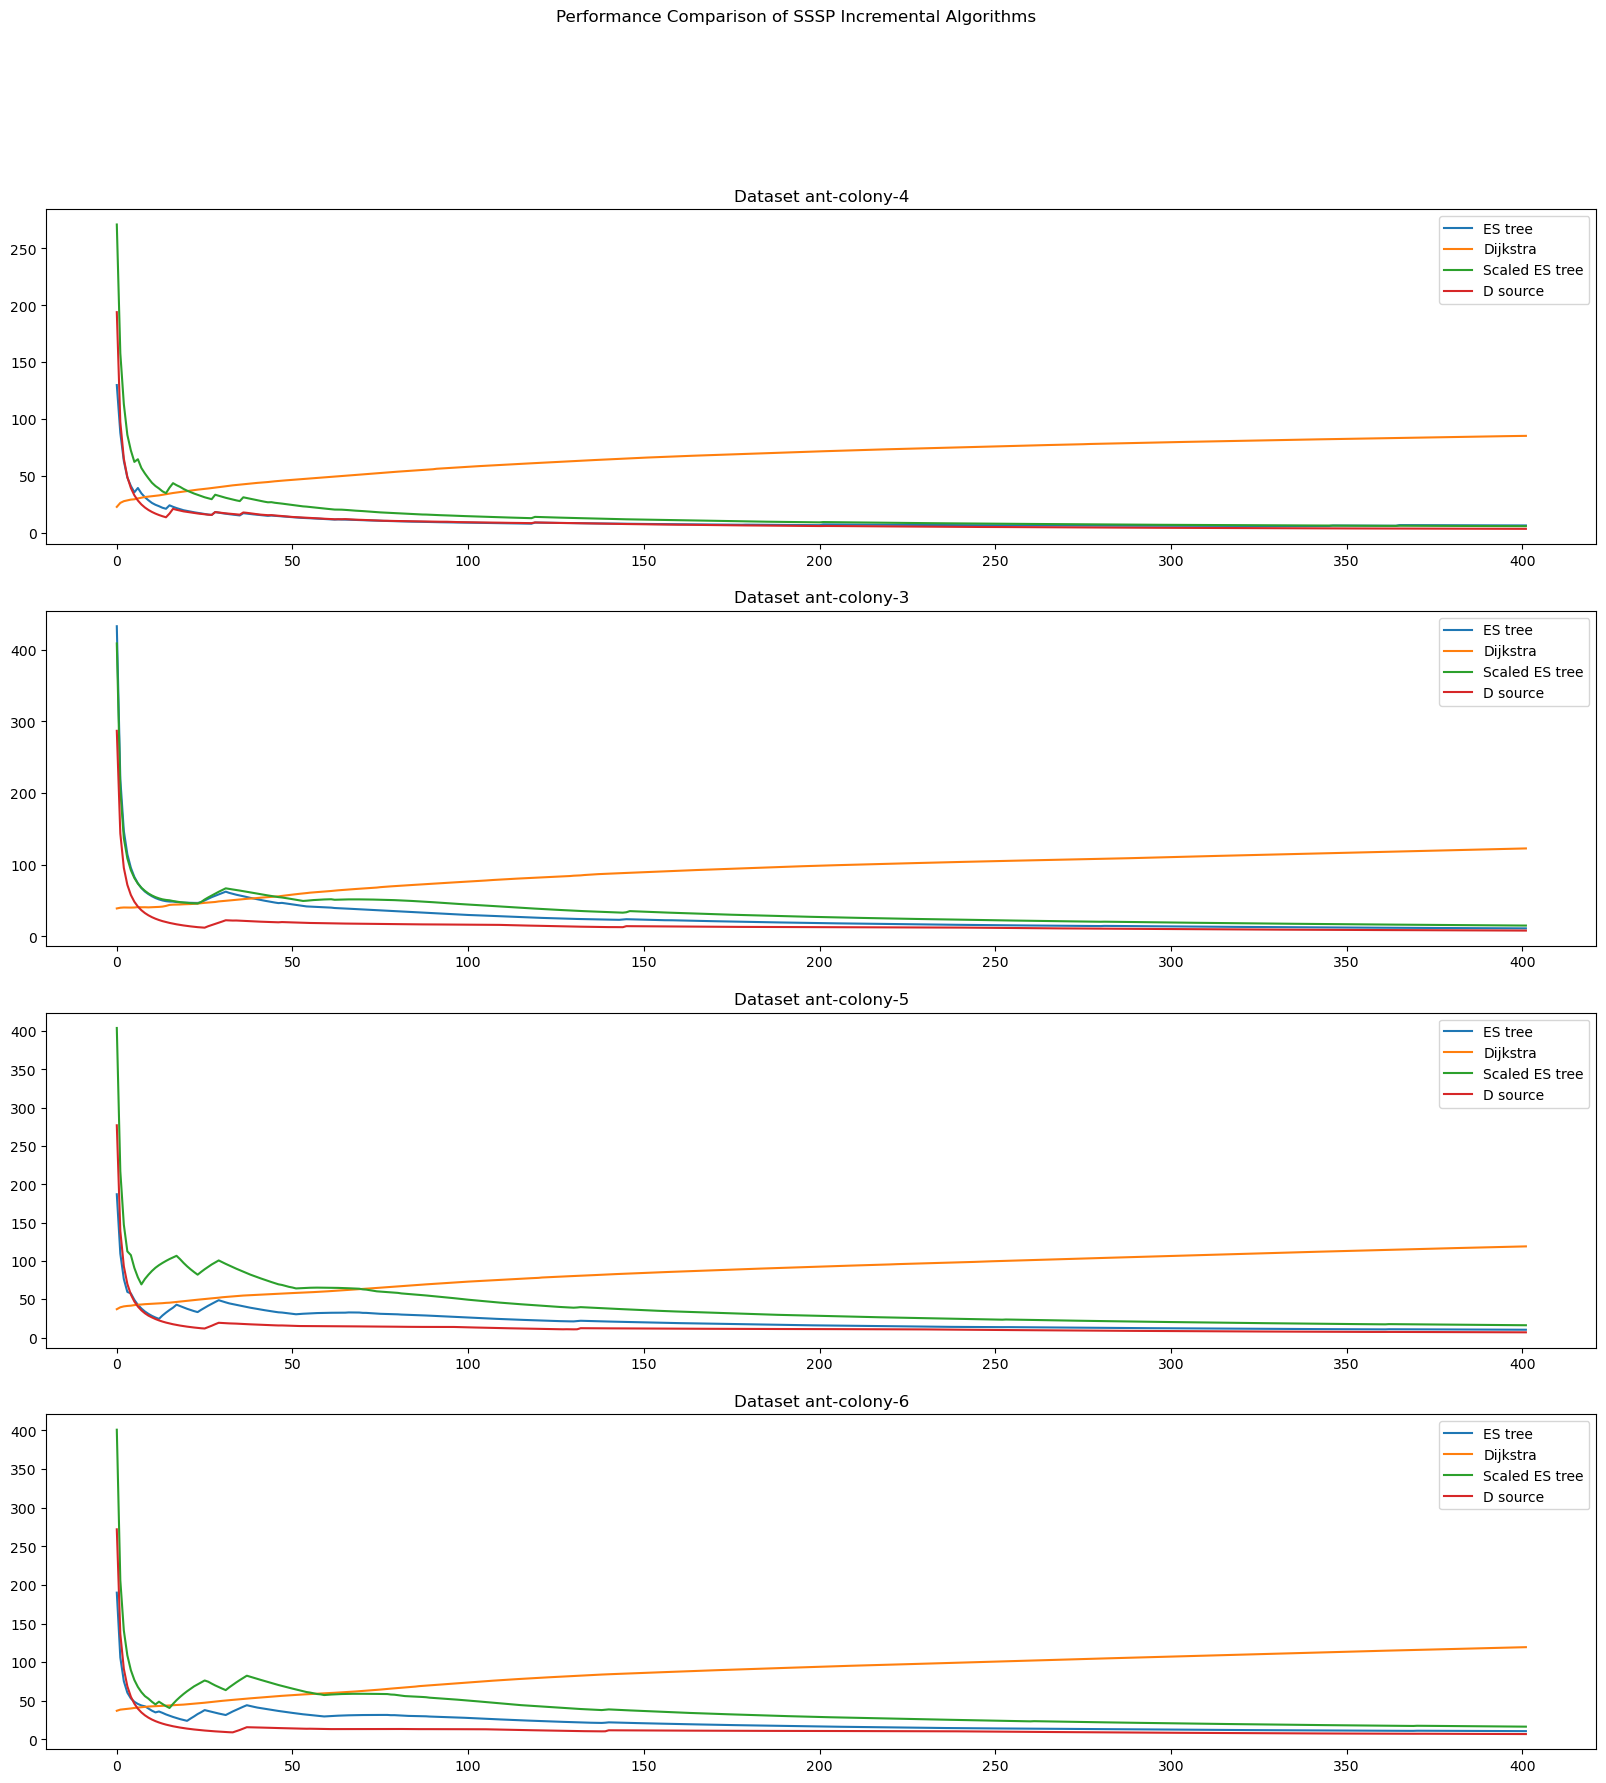

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_EStree'], label="ES tree")
    axs[i].plot(df['mean_Dijkstra'], label="Dijkstra")
#     axs[i].plot(df['mean_IncrementalDynamicSSSP'], label="Incremental Dynamic SSSP")
    axs[i].plot(df['mean_ScaledEStree'], label="Scaled ES tree")
    axs[i].plot(df['mean_Dsource'], label="D source")
    axs[i].set_title(f'Dataset {files[i][0:12]}')
    axs[i].legend()

fig.suptitle("Performance Comparison of SSSP Incremental Algorithms")
plt.show()

In [6]:
for i, df in enumerate(dfs):
    print('for dataset ', files[i][:12])
    print('EStree ', df['EStree'].mean())
    print('Dijkstra ', df['Dijkstra'].mean())
    print('IncrementalDynamicSSSP', df['IncrementalDynamicSSSP'].mean())
    print('ScaledEStree', df['mean_ScaledEStree'].mean())

for dataset  ant-colony-4
EStree  6.696517412935323
Dijkstra  85.36567164179104
IncrementalDynamicSSSP 1658.6990049751244
ScaledEStree 14.721920552129419
for dataset  ant-colony-3
EStree  11.194029850746269
Dijkstra  122.78358208955224
IncrementalDynamicSSSP 6166.256218905472
ScaledEStree 33.45734238750999
for dataset  ant-colony-5
EStree  10.191542288557214
Dijkstra  118.96517412935323
IncrementalDynamicSSSP 5454.363184079602
ScaledEStree 39.1649903489283
for dataset  ant-colony-6
EStree  10.629353233830846
Dijkstra  119.37562189054727
IncrementalDynamicSSSP 5524.062189054726
ScaledEStree 36.88201795304436


### Subproblem - Maximal Independent Set in Incremental setting

In [7]:
directory = 'results/short/IncrementalMIS/runtimes'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalMIS/runtimes/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

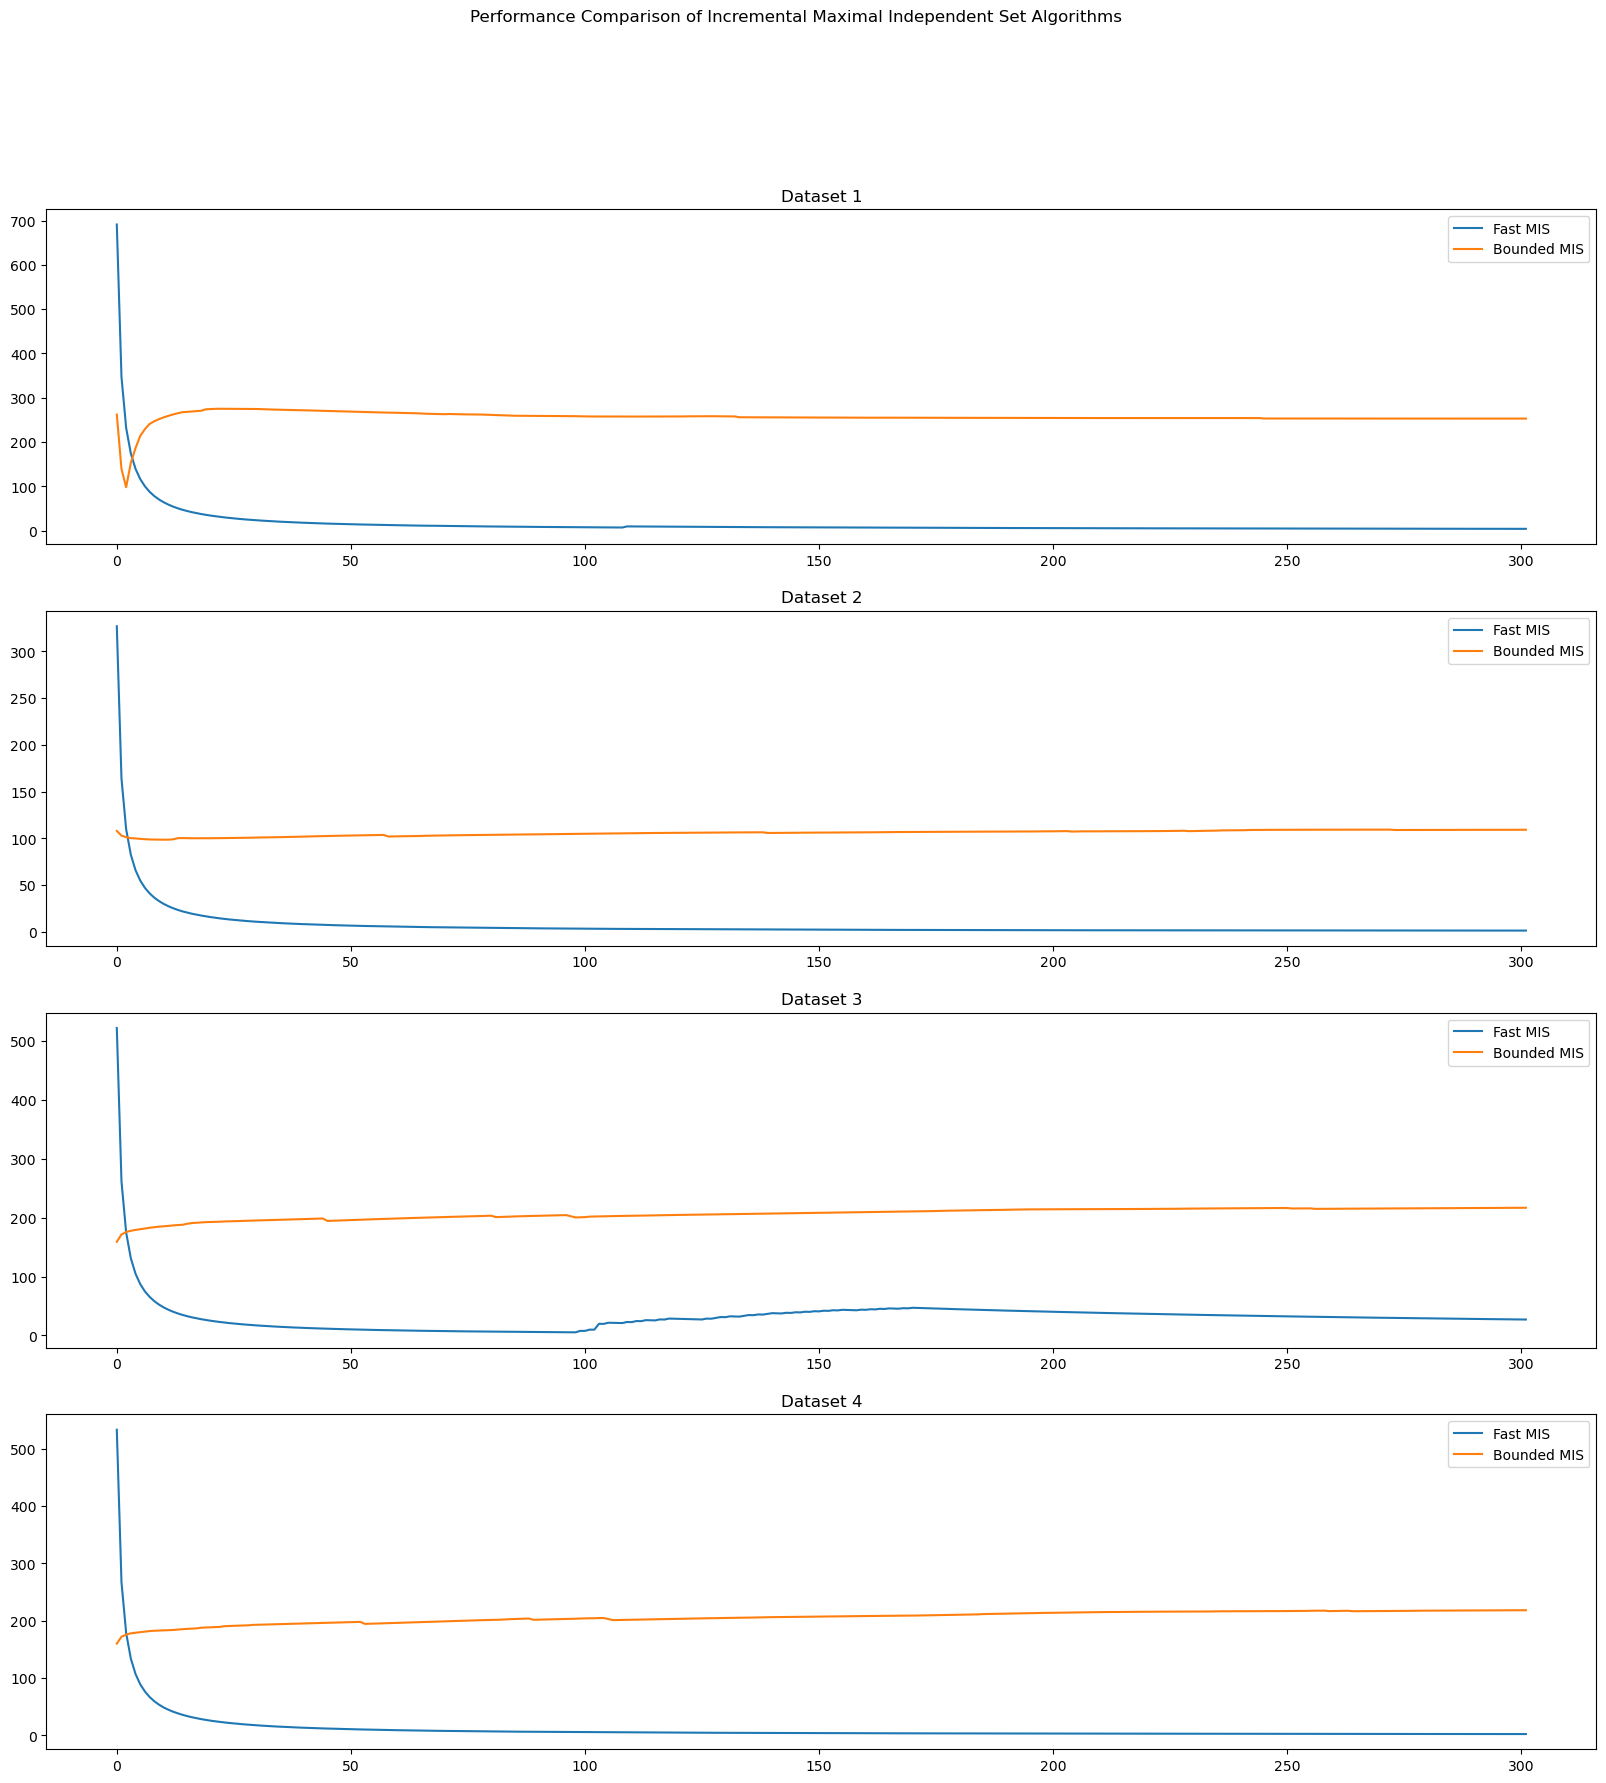

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_FastMIS'], label="Fast MIS")
    axs[i].plot(df['mean_KBoundedMIS'], label="Bounded MIS")
#     axs[i].plot(df['mean_GreedyMIS'], label="Greedy MIS")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Performance Comparison of Incremental Maximal Independent Set Algorithms")
plt.show()

In [9]:
for i, df in enumerate(dfs):
    print('runitmes for dataset ', files[i][:12])
    print('FastMIS ', df['FastMIS'].mean())
    print('KBoundedMIS ', df['KBoundedMIS'].mean())
#     print('GreedyMIS', df['GreedyMIS'].mean())

runitmes for dataset  ant-colony-3
FastMIS  4.033112582781457
KBoundedMIS  252.8708609271523
runitmes for dataset  ant-colony-4
FastMIS  1.3973509933774835
KBoundedMIS  109.26490066225166
runitmes for dataset  ant-colony-5
FastMIS  27.08609271523179
KBoundedMIS  216.7980132450331
runitmes for dataset  ant-colony-6
FastMIS  2.2847682119205297
KBoundedMIS  218.22847682119206


In [10]:
directory = 'results/short/IncrementalMIS/costs'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalMIS/costs/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

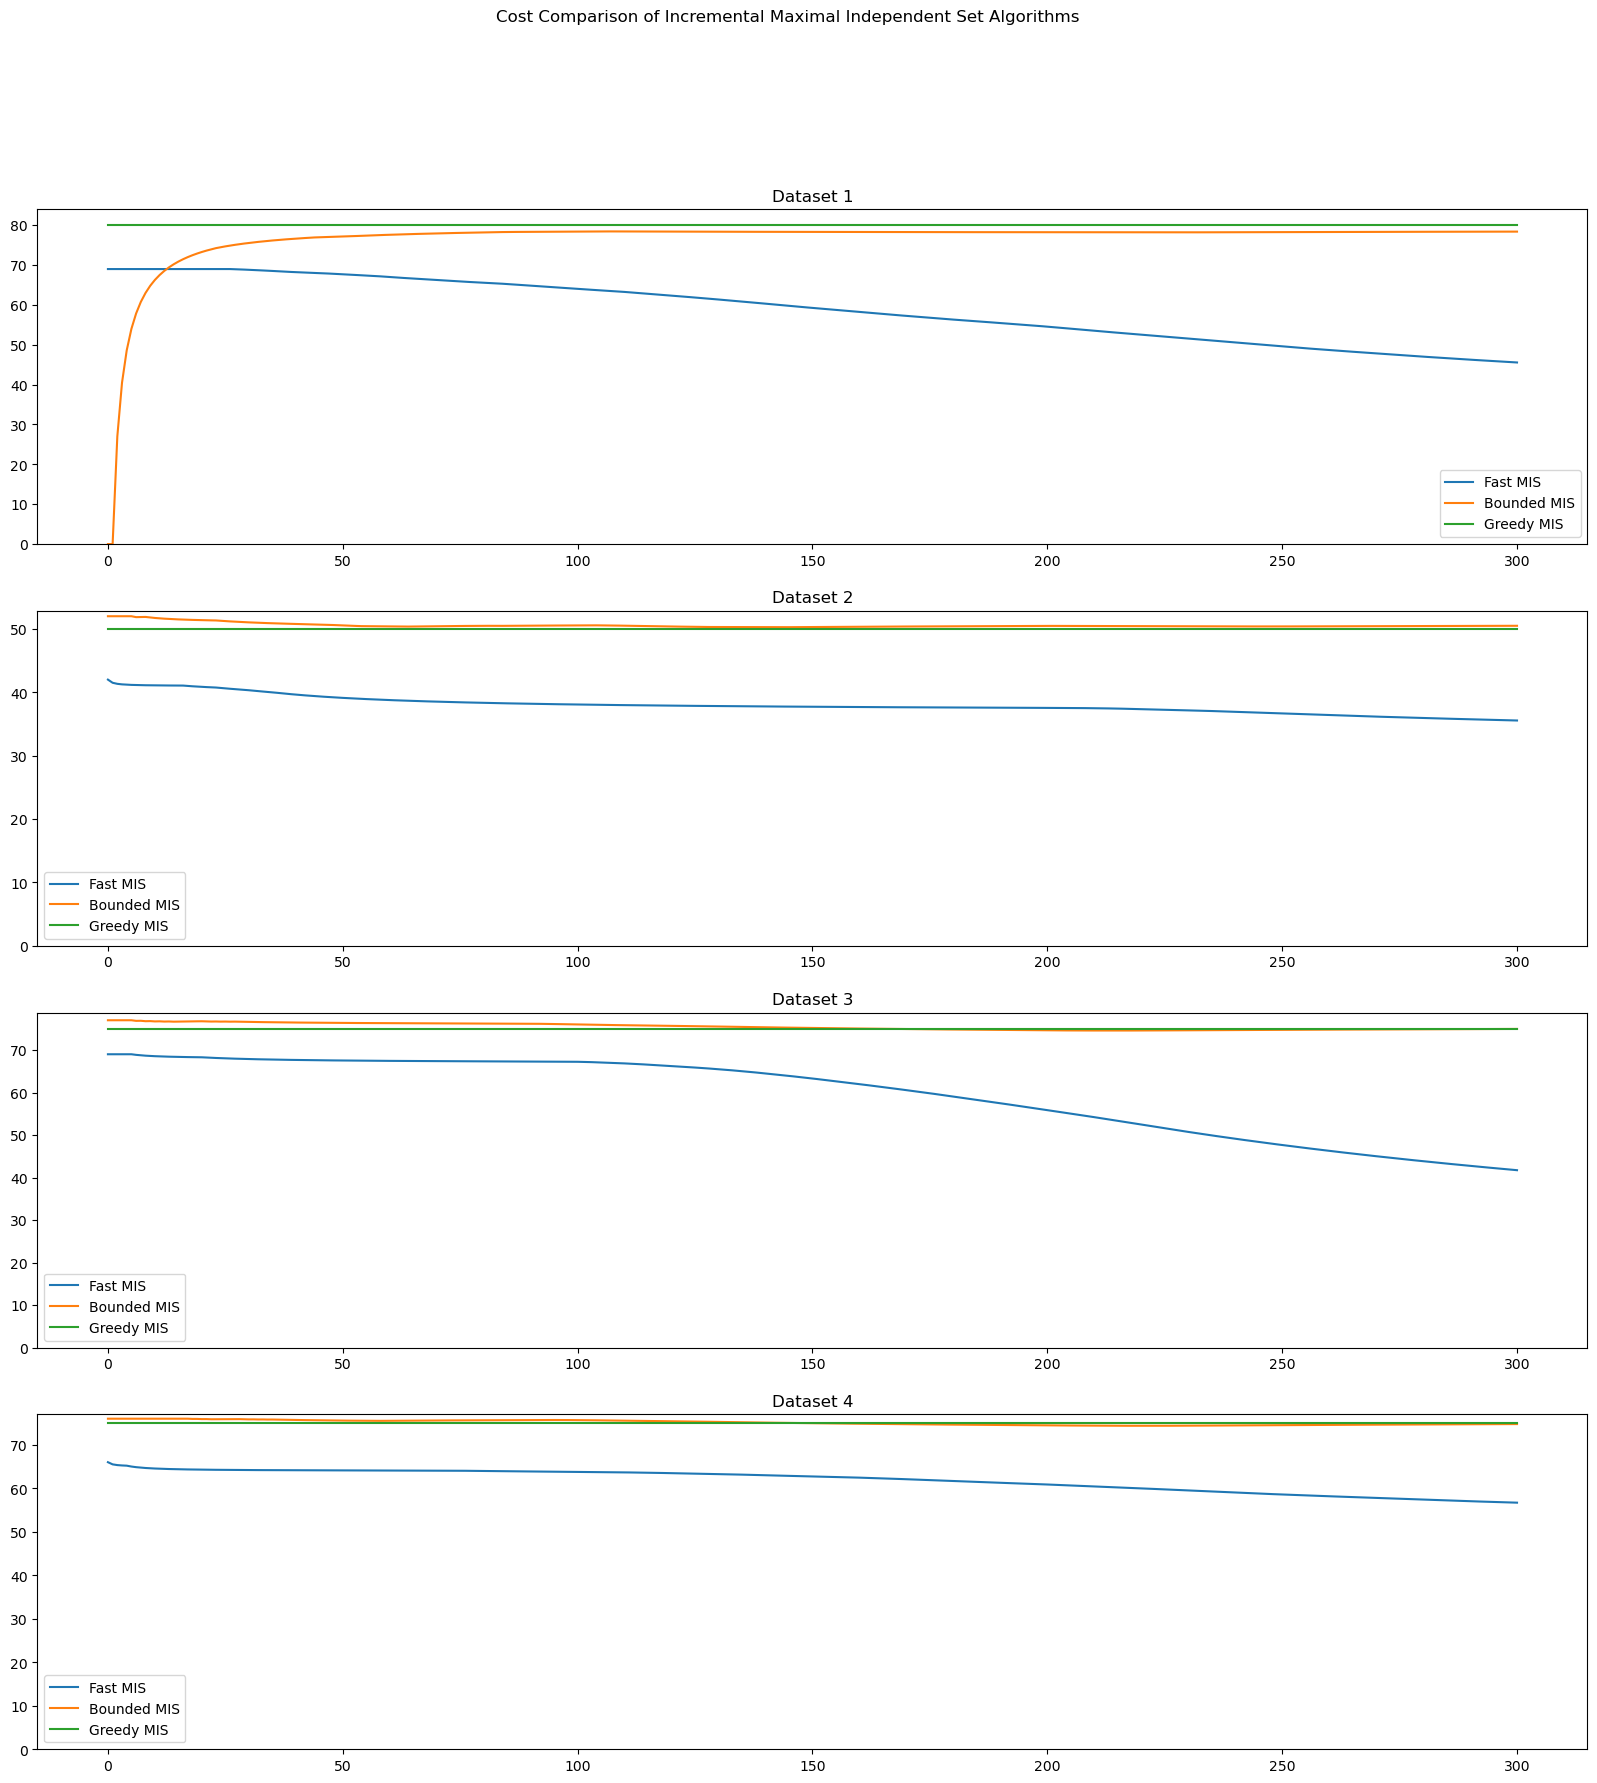

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_FastMIS'], label="Fast MIS")
    axs[i].plot(df['mean_KBoundedMIS'], label="Bounded MIS")
    axs[i].plot(df['mean_GreedyMIS'], label="Greedy MIS")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()
    axs[i].set_ylim(0)

fig.suptitle("Cost Comparison of Incremental Maximal Independent Set Algorithms")
plt.show()

In [12]:
for i, df in enumerate(dfs):
    print('costs for dataset ', files[i][:12])
    print('FastMIS ', df['FastMIS'].mean())
    print('KBoundedMIS ', df['KBoundedMIS'].mean())
#     print('GreedyMIS', df['GreedyMIS'].mean())

costs for dataset  ant-colony-3
FastMIS  45.561461794019934
KBoundedMIS  78.3953488372093
costs for dataset  ant-colony-4
FastMIS  35.548172757475086
KBoundedMIS  50.49169435215947
costs for dataset  ant-colony-5
FastMIS  41.72425249169435
KBoundedMIS  74.95681063122923
costs for dataset  ant-colony-6
FastMIS  56.69435215946844
KBoundedMIS  74.7641196013289


### Results of Decremental algorithm integrating ES tree

#### Dynamic algorithm from paper : 
    Fully Dynamic k-Center Clustering in Doubling Metrics
#### Static algorithms from papers: 
    Quick k-Median, k-Center, and Facility Location for Sparse Graphs
    On the Fine-Grained Complexity of Approximating k-Center in Sparse Graphs

In [13]:
directory = 'results/short/DecrementalKcenter/runtimes'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/DecrementalKcenter/runtimes/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

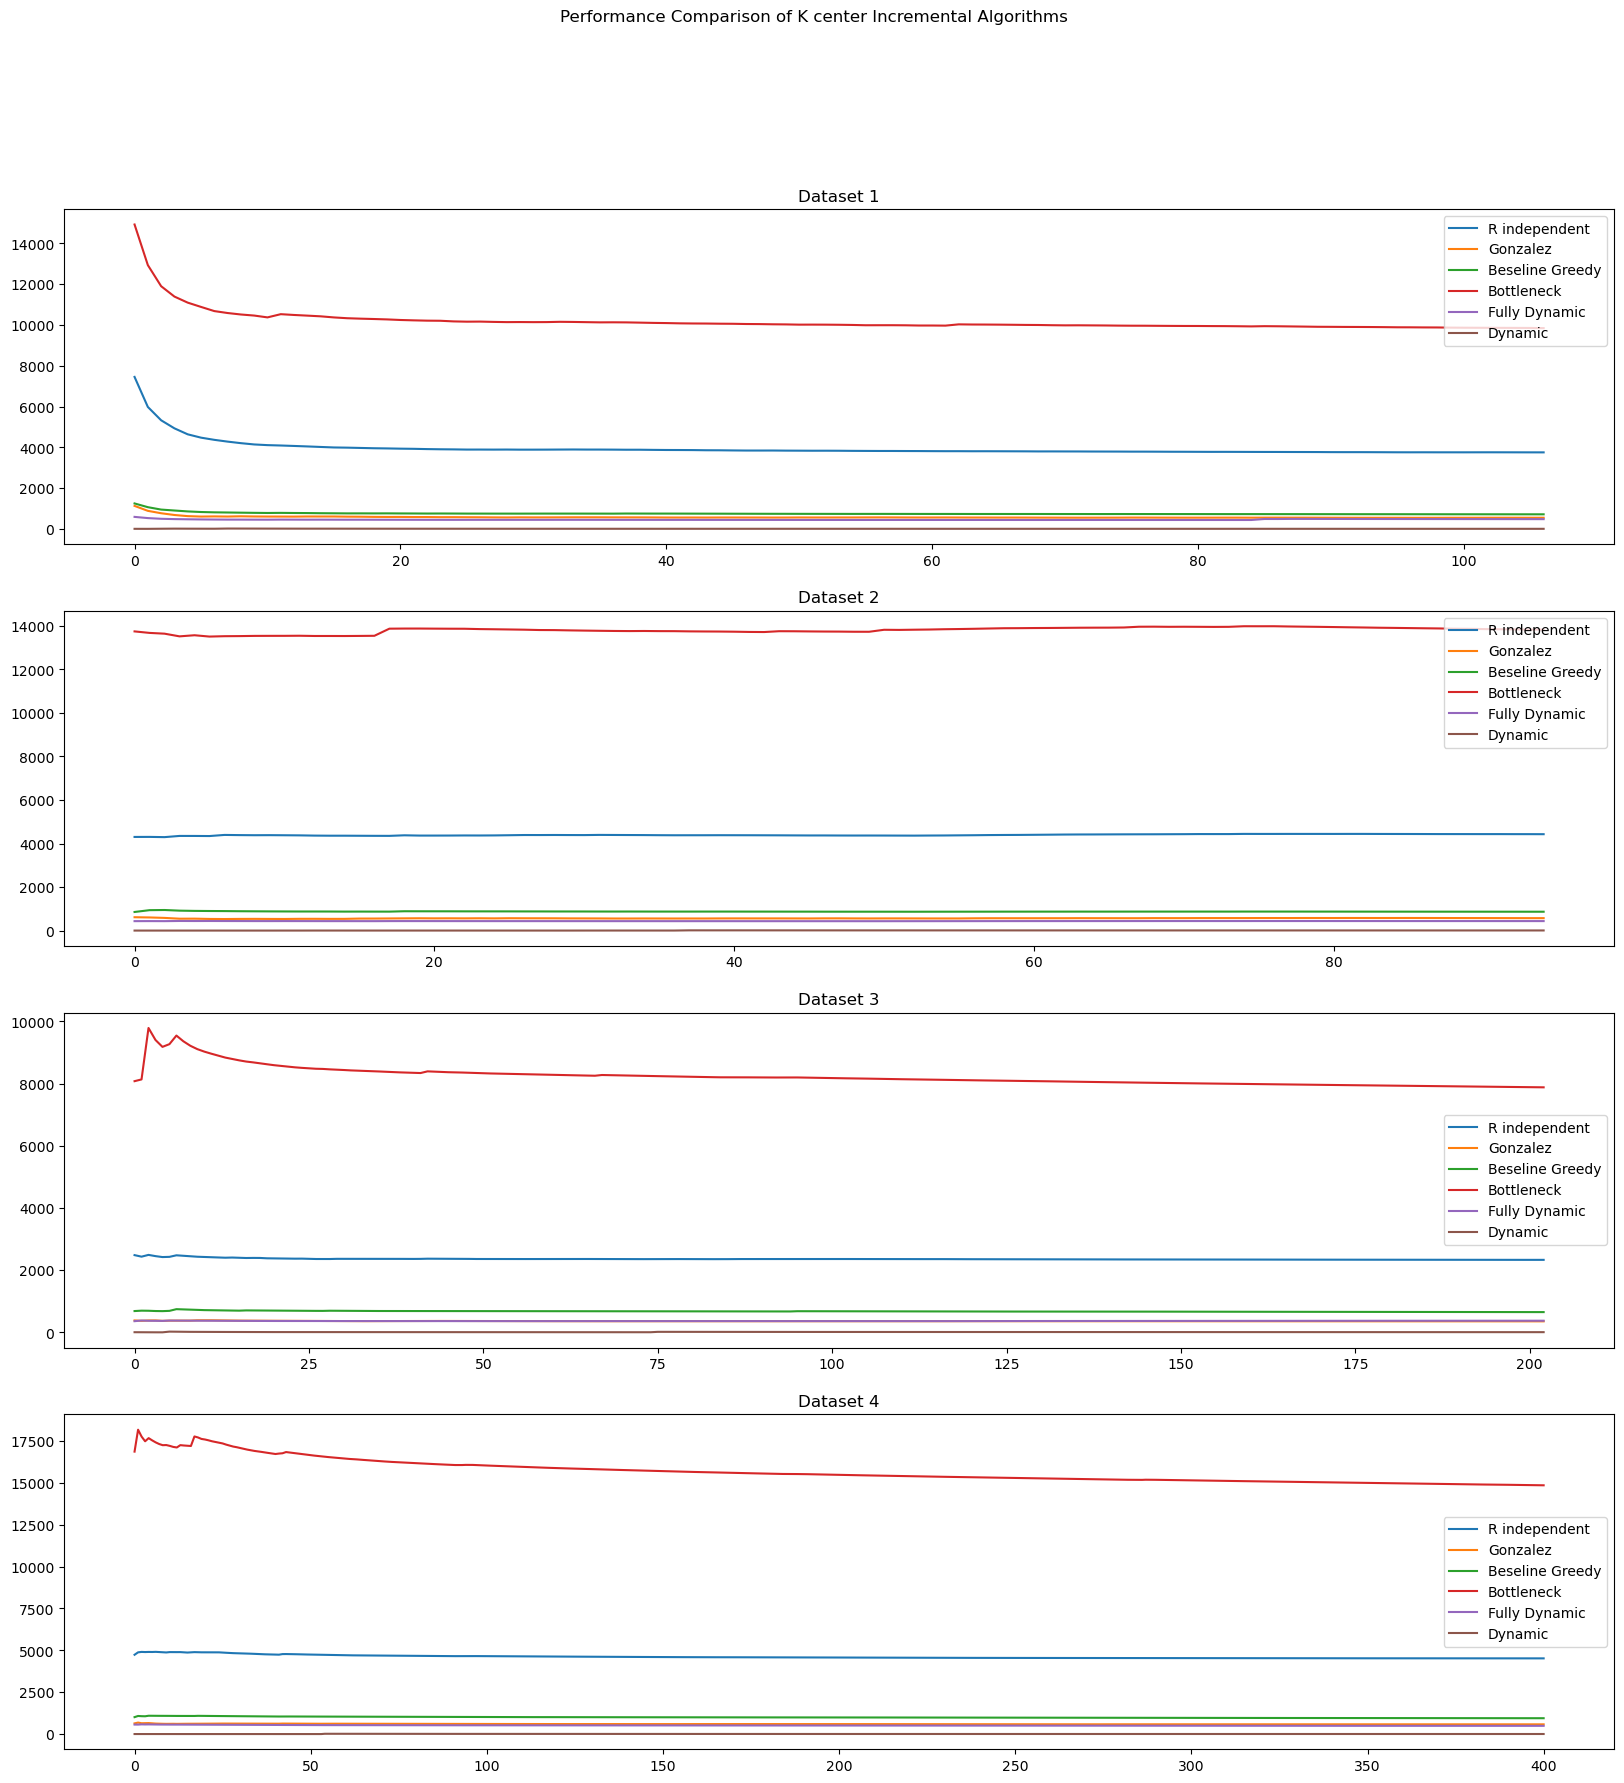

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].plot(df['mean_Dynamic'], label="Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Performance Comparison of K center Incremental Algorithms")
plt.show()

In [15]:
for i, df in enumerate(dfs):
    print('runtimes for dataset ', files[i][:12])
    print('RIndependent ', df['RIndependent'].mean())
    print('Gonzalez ', df['Gonzalez'].mean())
    print('BaselineGreedy', df['BaselineGreedy'].mean())
    print('Bottleneck ', df['Bottleneck'].mean())
    print('FullyDynamic ', df['FullyDynamic'].mean())
    print('Dynamic', df['Dynamic'].mean())

runtimes for dataset  ant-colony-3
RIndependent  3752.542056074766
Gonzalez  547.8317757009346
BaselineGreedy 716.1869158878504
Bottleneck  9842.635514018692
FullyDynamic  479.0747663551402
Dynamic 5.299065420560748
runtimes for dataset  ant-colony-5
RIndependent  4429.242105263158
Gonzalez  574.3684210526316
BaselineGreedy 869.4736842105264
Bottleneck  13819.0
FullyDynamic  439.3263157894737
Dynamic 9.452631578947368
runtimes for dataset  ant-colony-4
RIndependent  2333.881773399015
Gonzalez  357.2118226600985
BaselineGreedy 654.3103448275862
Bottleneck  7880.226600985222
FullyDynamic  377.4975369458128
Dynamic 9.61576354679803
runtimes for dataset  ant-colony-6
RIndependent  4520.862842892768
Gonzalez  584.5561097256858
BaselineGreedy 950.1645885286783
Bottleneck  14847.311720698255
FullyDynamic  495.4862842892768
Dynamic 8.017456359102244


In [16]:
directory = 'results/short/DecrementalKcenter/costs'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/DecrementalKcenter/costs/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

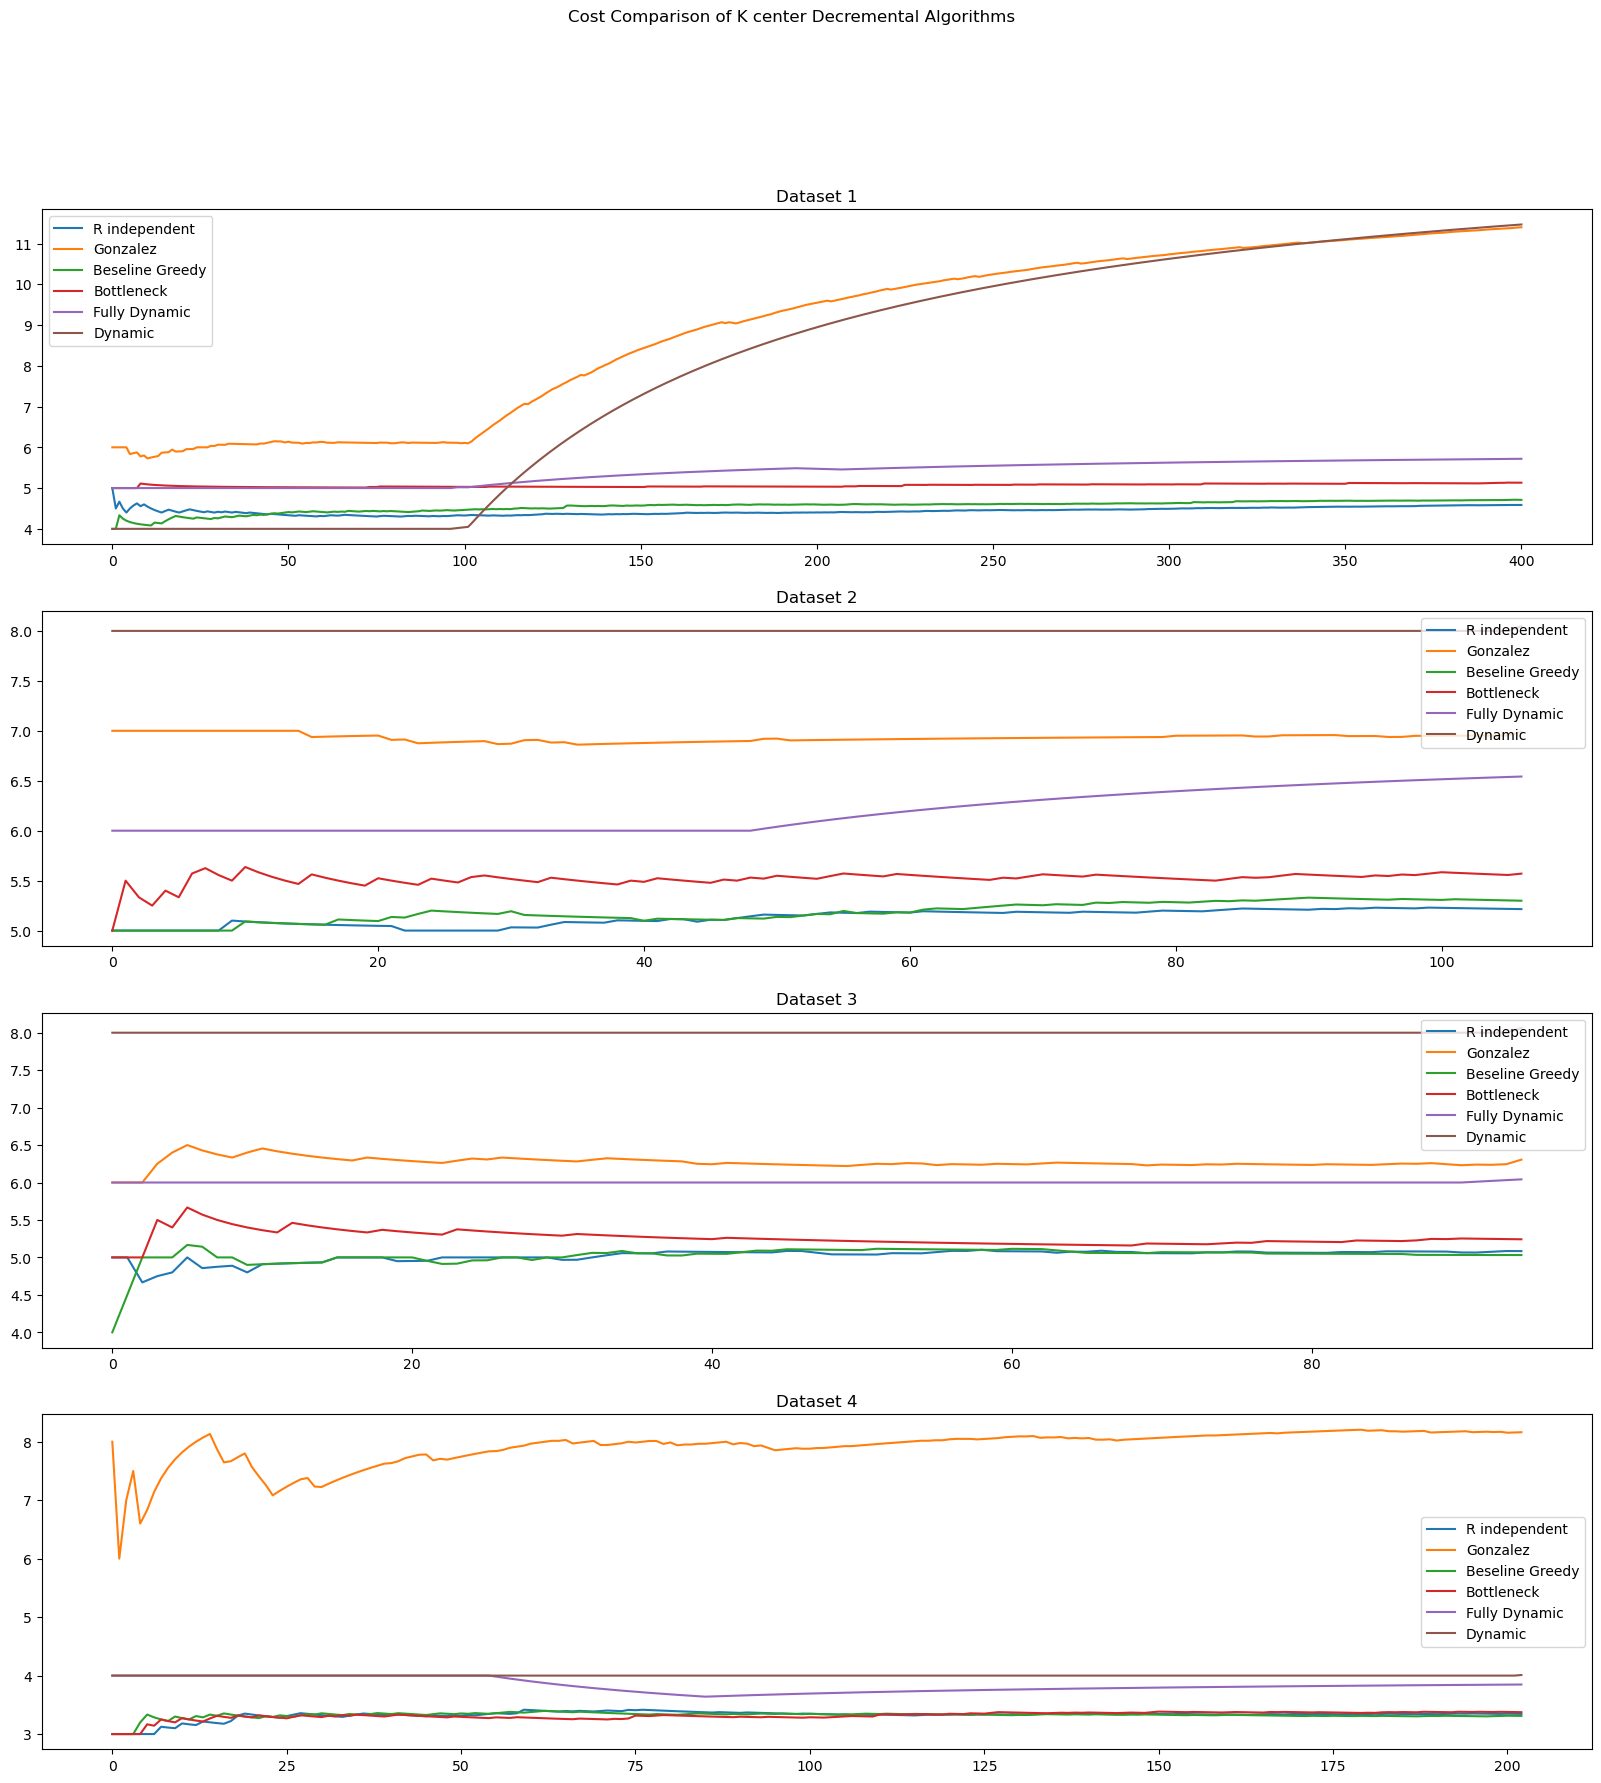

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].plot(df['mean_Dynamic'], label="Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Cost Comparison of K center Decremental Algorithms")
plt.show()

In [18]:
for i, df in enumerate(dfs):
    print('costs for dataset ', files[i][:12])
    print('RIndependent ', df['RIndependent'].mean())
    print('Gonzalez ', df['Gonzalez'].mean())
    print('BaselineGreedy', df['BaselineGreedy'].mean())
    print('Bottleneck ', df['Bottleneck'].mean())
    print('FullyDynamic ', df['FullyDynamic'].mean())
    print('Dynamic', df['Dynamic'].mean())

costs for dataset  ant-colony-6
RIndependent  4.586034912718205
Gonzalez  11.399002493765586
BaselineGreedy 4.71072319201995
Bottleneck  5.132169576059851
FullyDynamic  5.7182044887780545
Dynamic 11.46633416458853
costs for dataset  ant-colony-3
RIndependent  5.214953271028038
Gonzalez  6.990654205607477
BaselineGreedy 5.299065420560748
Bottleneck  5.570093457943925
FullyDynamic  6.542056074766355
Dynamic 8.046728971962617
costs for dataset  ant-colony-5
RIndependent  5.08421052631579
Gonzalez  6.3052631578947365
BaselineGreedy 5.031578947368421
Bottleneck  5.242105263157895
FullyDynamic  6.042105263157895
Dynamic 8.063157894736841
costs for dataset  ant-colony-4
RIndependent  3.3448275862068964
Gonzalez  8.16256157635468
BaselineGreedy 3.310344827586207
Bottleneck  3.374384236453202
FullyDynamic  3.8472906403940885
Dynamic 4.009852216748769


### Results of Incremental algorithm integrating Scaled ES tree

In [19]:
directory = 'results/short/IncrementalKcenter/runtimes'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalKcenter/runtimes/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

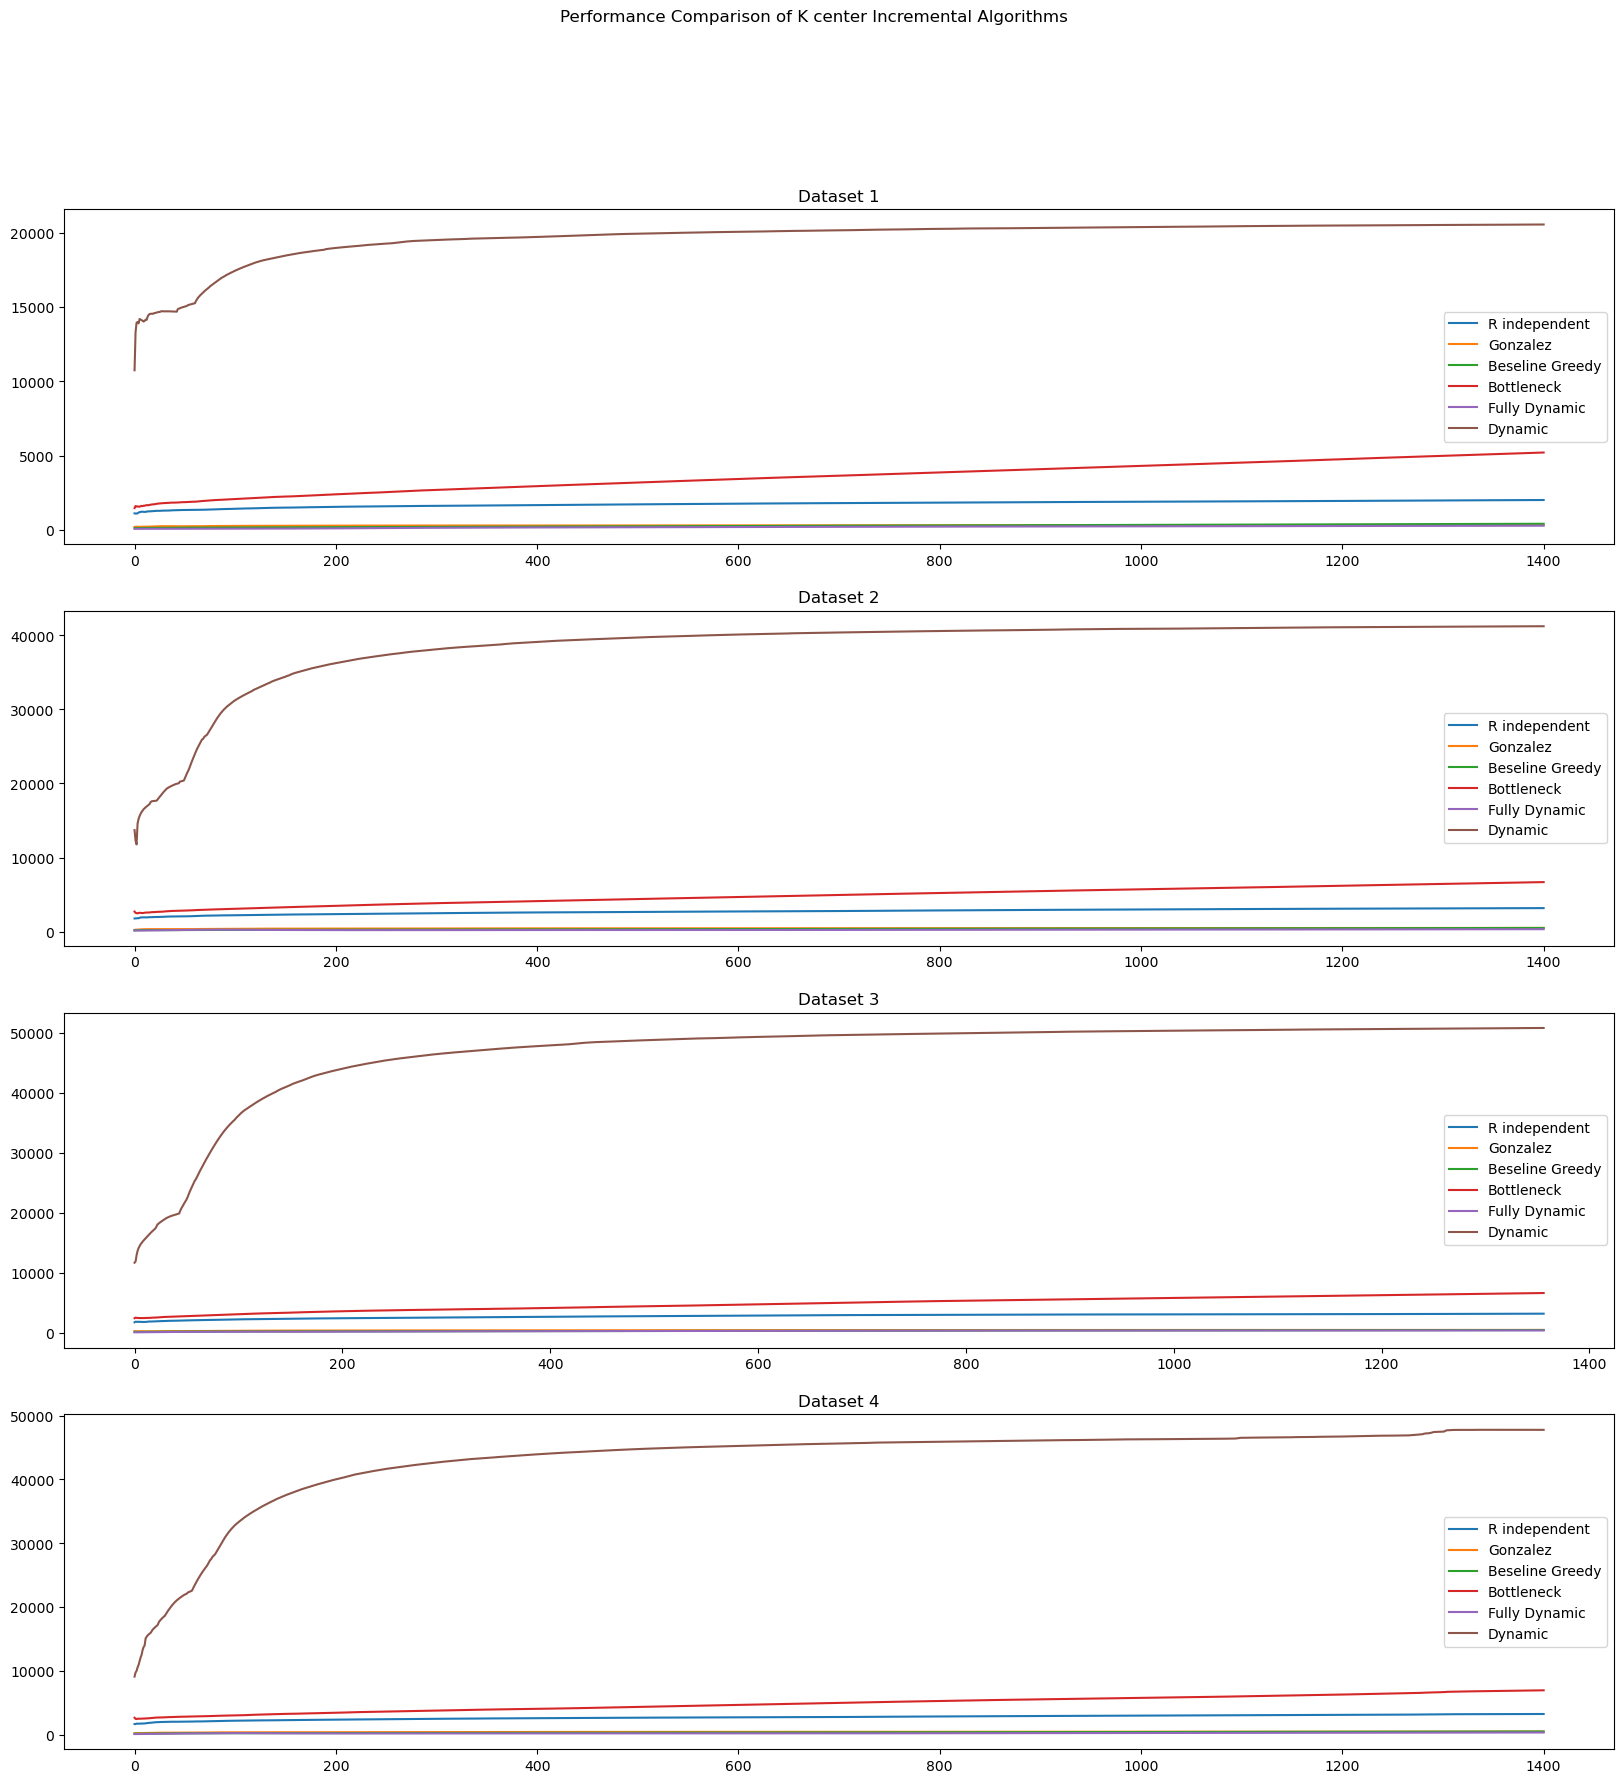

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].plot(df['mean_Dynamic'], label="Dynamic")
#     axs[i].plot(df['mean_ModifiedIncremental'], label="Modified Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Performance Comparison of K center Incremental Algorithms")
plt.show()

In [21]:
for i, df in enumerate(dfs):
    print('runtimes for dataset ', files[i][:12])
    print('RIndependent ', df['RIndependent'].mean())
    print('Gonzalez ', df['Gonzalez'].mean())
    print('BaselineGreedy', df['BaselineGreedy'].mean())
    print('Bottleneck ', df['Bottleneck'].mean())
    print('FullyDynamic ', df['FullyDynamic'].mean())
    print('Dynamic', df['Dynamic'].mean())

runtimes for dataset  ant-colony-4
RIndependent  2012.7687366167024
Gonzalez  330.77801570306923
BaselineGreedy 412.93790149892936
Bottleneck  5210.655246252677
FullyDynamic  282.9036402569593
Dynamic 20565.83725910064
runtimes for dataset  ant-colony-5
RIndependent  3167.9593147751607
Gonzalez  491.48822269807283
BaselineGreedy 488.98786581013565
Bottleneck  6680.684511063526
FullyDynamic  322.0728051391863
Dynamic 41240.59743040685
runtimes for dataset  ant-colony-3
RIndependent  3208.6064848931464
Gonzalez  503.4782608695652
BaselineGreedy 486.19233603537214
Bottleneck  6650.201915991157
FullyDynamic  411.82608695652175
Dynamic 50814.9970523213
runtimes for dataset  ant-colony-6
RIndependent  3251.865096359743
Gonzalez  508.89150606709495
BaselineGreedy 509.71948608137046
Bottleneck  6964.321199143469
FullyDynamic  350.87651677373304
Dynamic 47773.952890792294


In [22]:
directory = 'results/short/IncrementalKcenter/costs'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/IncrementalKcenter/costs/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

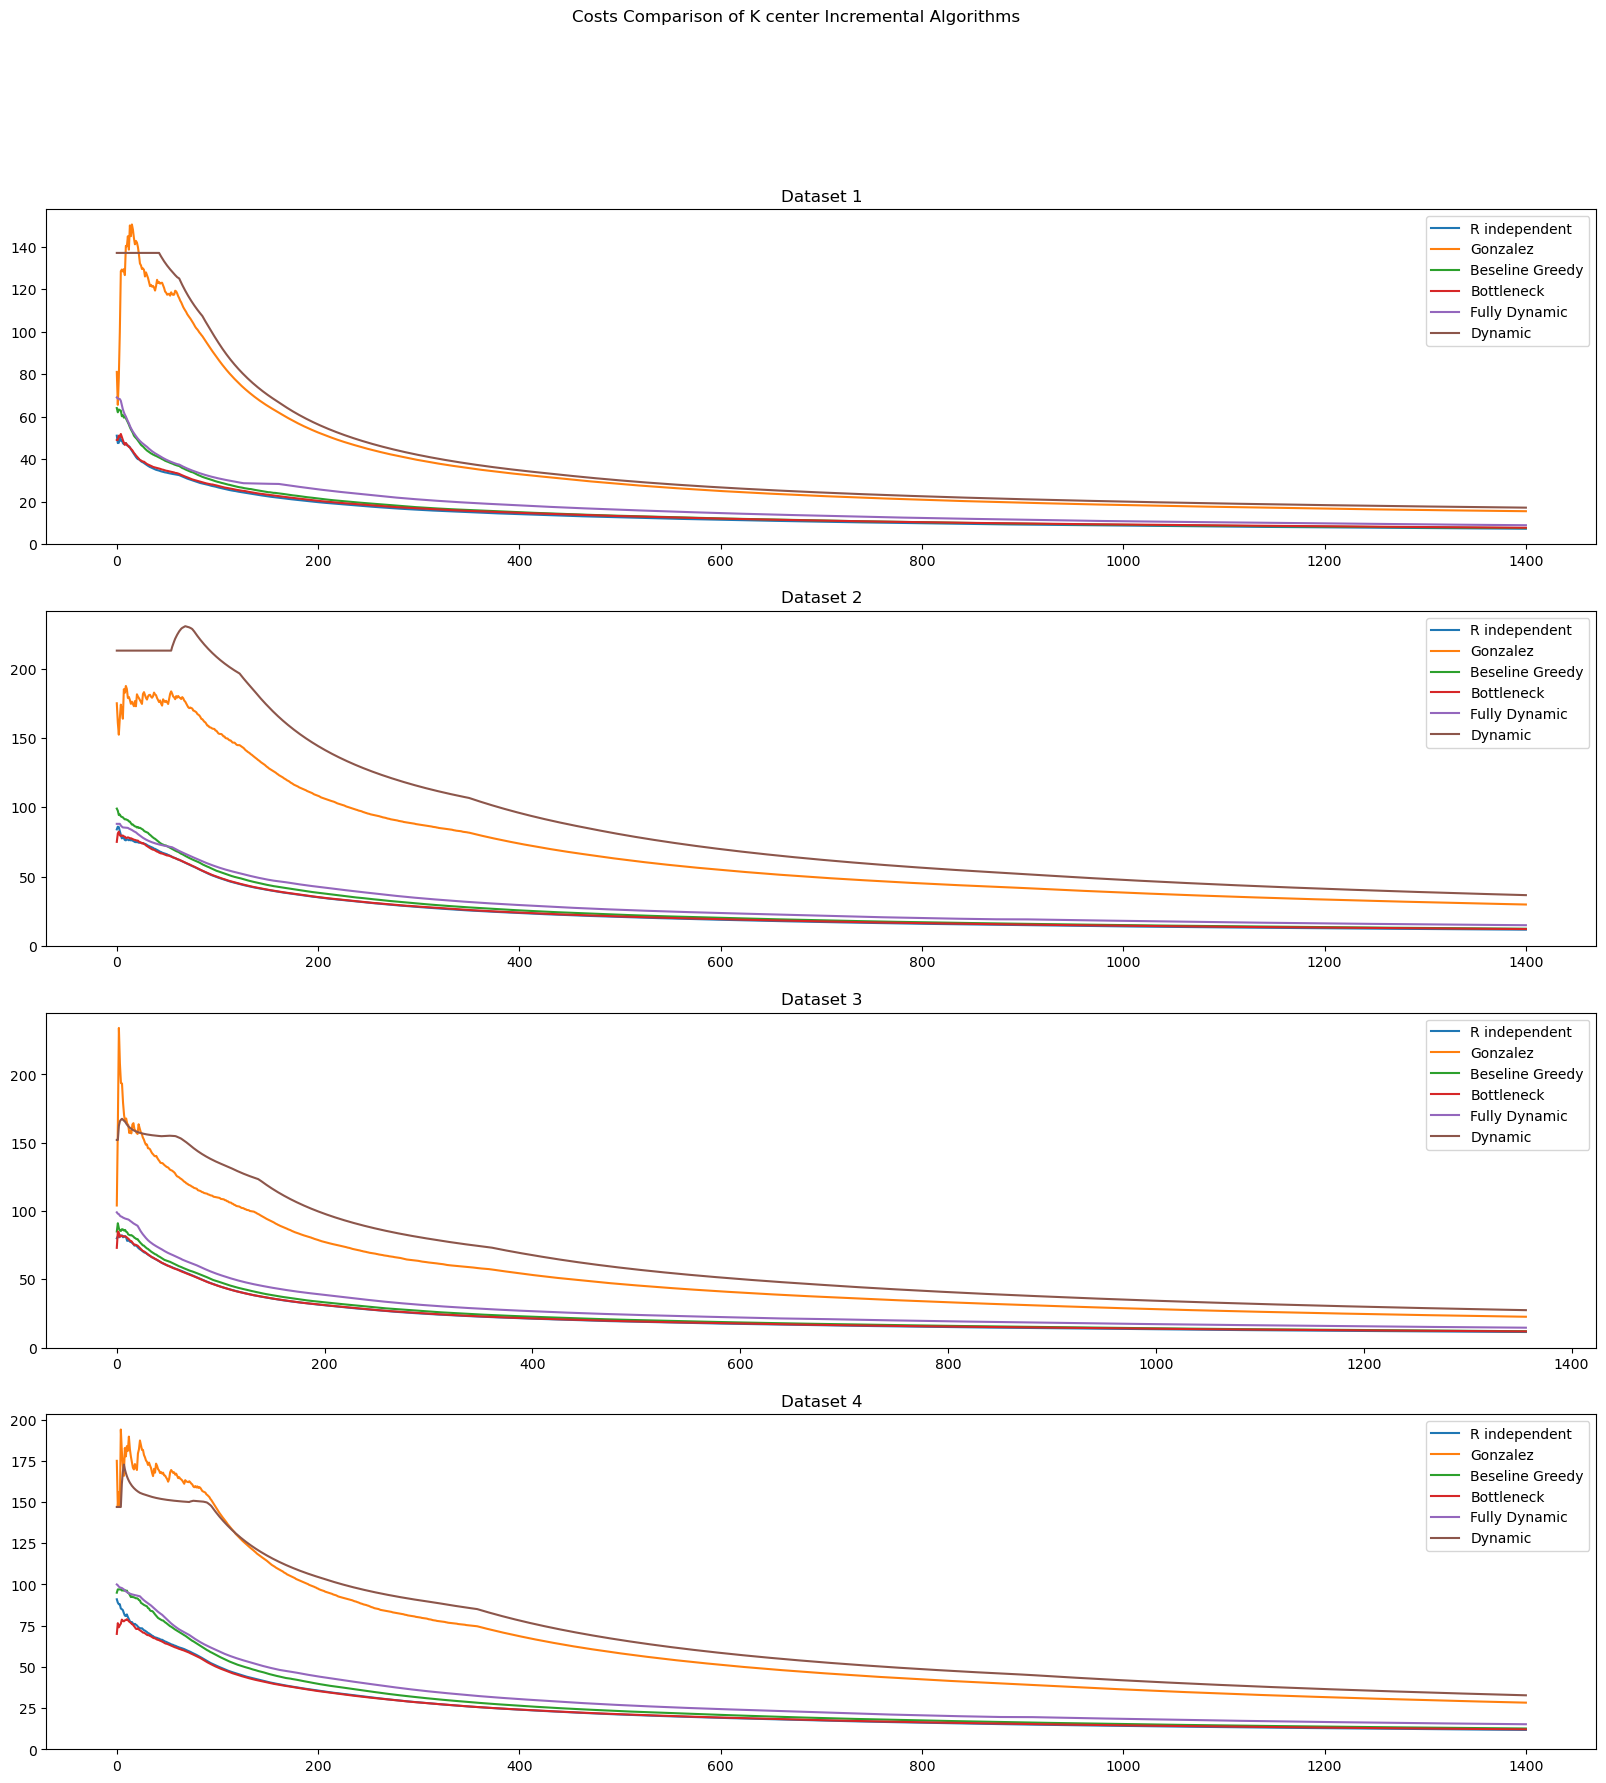

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].plot(df['mean_Dynamic'], label="Dynamic")
#     axs[i].plot(df['mean_ModifiedIncremental'], label="Modified Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()
    axs[i].set_ylim(0)
    
fig.suptitle("Costs Comparison of K center Incremental Algorithms")
plt.show()

In [24]:
for i, df in enumerate(dfs):
    print('costs for dataset ', files[i][:12])
    print('RIndependent ', df['RIndependent'].mean())
    print('Gonzalez ', df['Gonzalez'].mean())
    print('BaselineGreedy', df['BaselineGreedy'].mean())
    print('Bottleneck ', df['Bottleneck'].mean())
    print('FullyDynamic ', df['FullyDynamic'].mean())
    print('Dynamic', df['Dynamic'].mean())

costs for dataset  ant-colony-4
RIndependent  7.2312633832976445
Gonzalez  15.458244111349037
BaselineGreedy 7.518201284796574
Bottleneck  7.683083511777302
FullyDynamic  8.87009279086367
Dynamic 17.137044967880087
costs for dataset  ant-colony-5
RIndependent  11.649536045681655
Gonzalez  29.79443254817987
BaselineGreedy 12.331905781584583
Bottleneck  12.083511777301927
FullyDynamic  14.859386152748037
Dynamic 36.55674518201285
costs for dataset  ant-colony-3
RIndependent  11.37509211495947
Gonzalez  22.543846720707442
BaselineGreedy 11.951363301400148
Bottleneck  11.812822402358144
FullyDynamic  14.531319086219602
Dynamic 27.372881355932204
costs for dataset  ant-colony-6
RIndependent  11.754461099214847
Gonzalez  28.290506780870807
BaselineGreedy 12.602426837972876
Bottleneck  12.10206995003569
FullyDynamic  15.190578158458244
Dynamic 32.74660956459672


### Results of Fully Dynamic algorithm integrating Dijkstra

In [25]:
directory = 'results/short/FullKcenter/runtimes'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/FullKcenter/runtimes/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

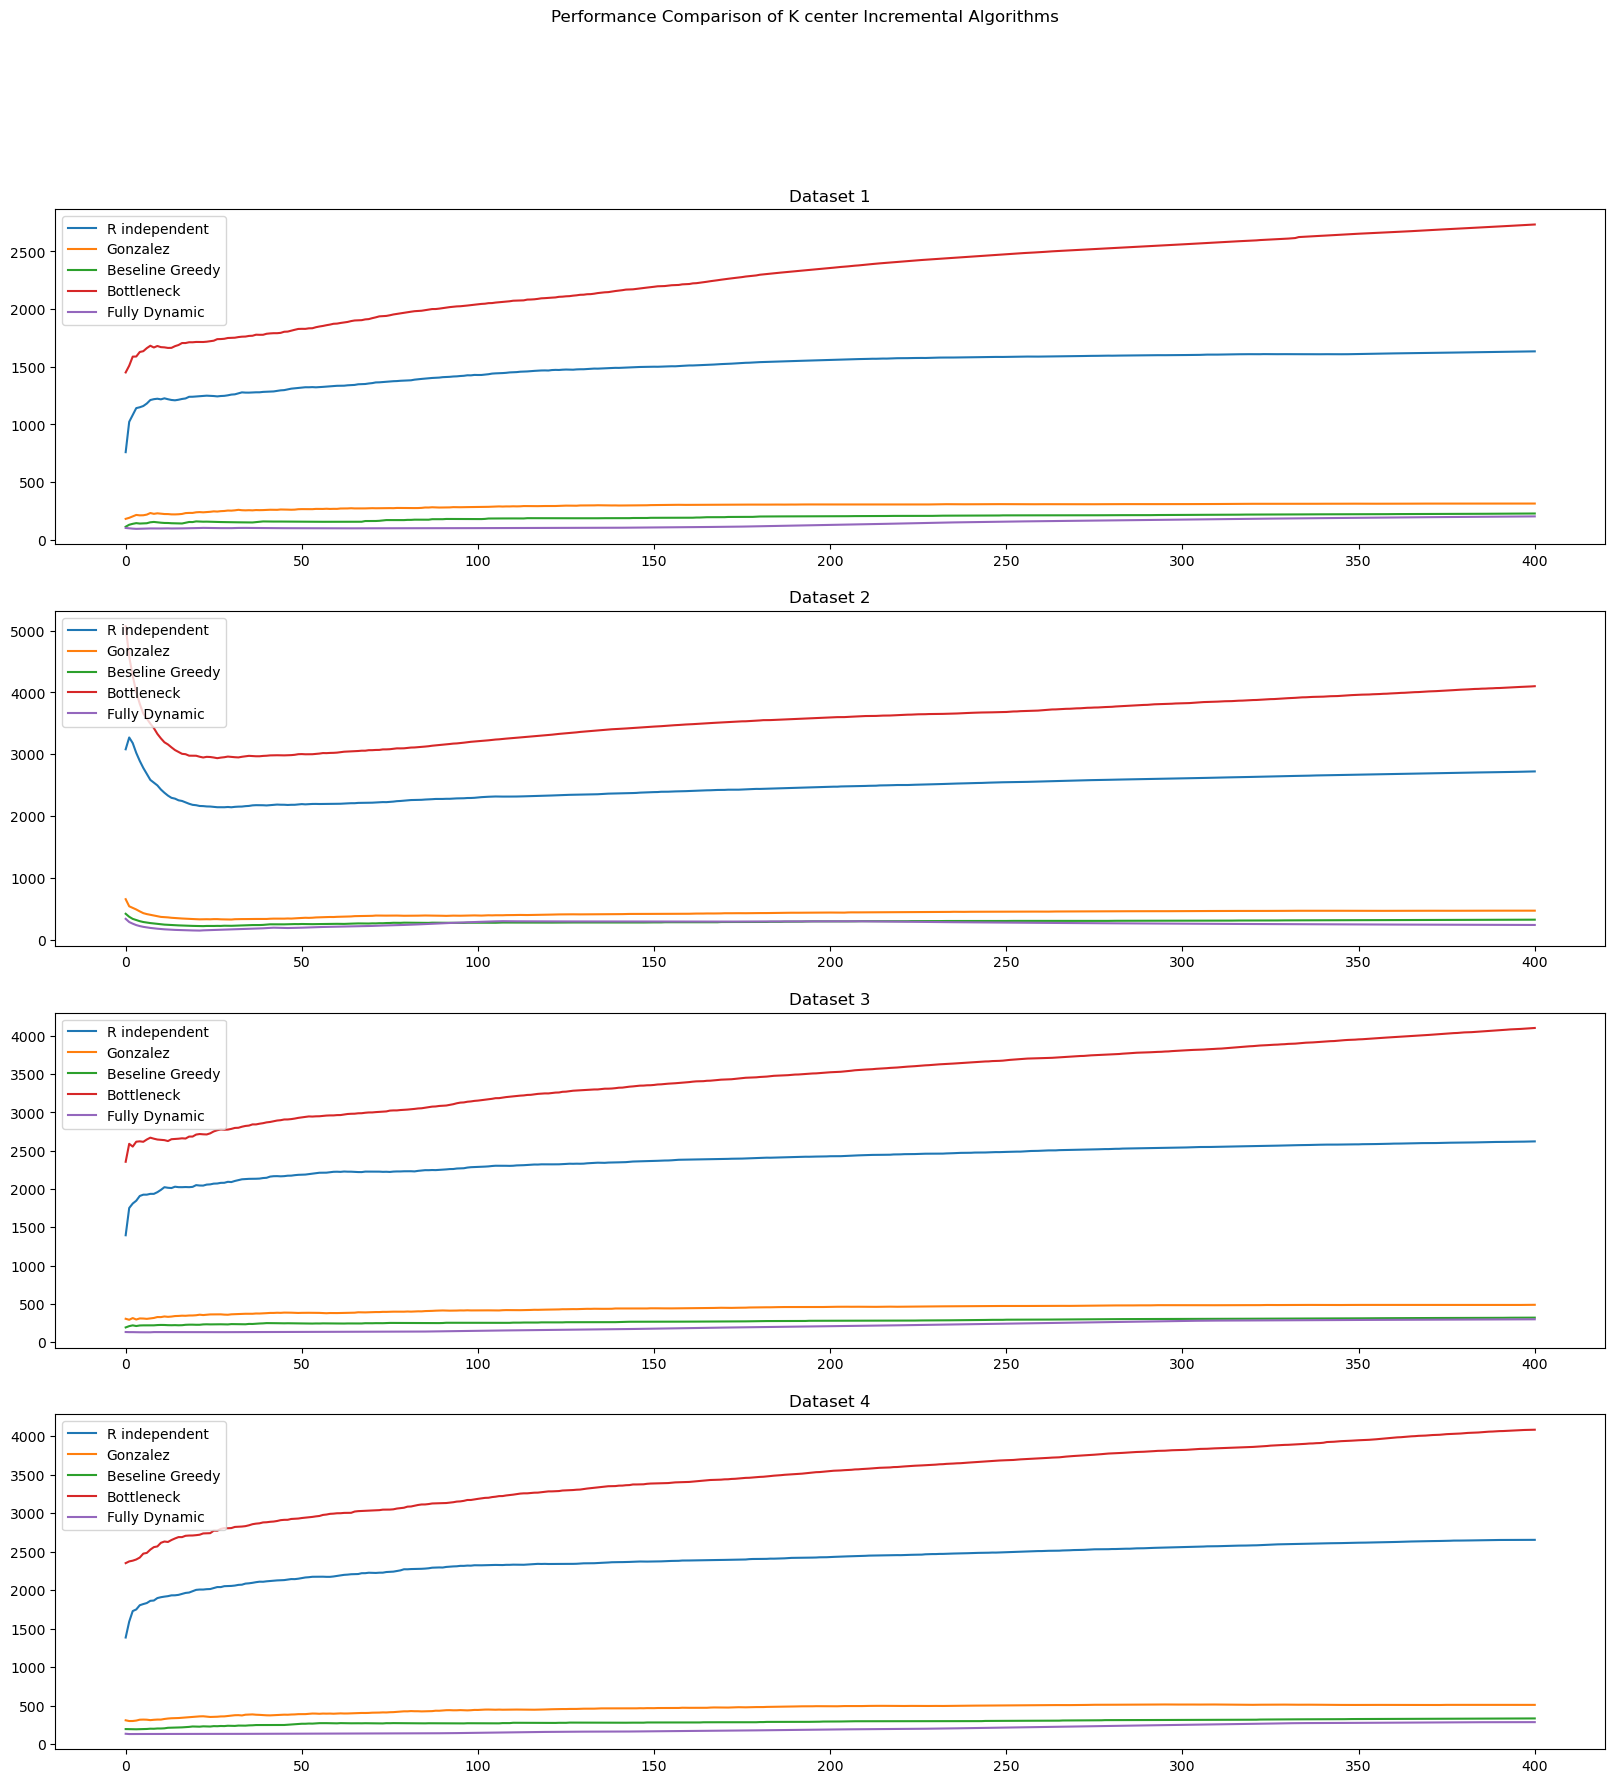

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()

fig.suptitle("Performance Comparison of K center Incremental Algorithms")
plt.show()

In [27]:
for i, df in enumerate(dfs):
    print('runtimes for dataset ', files[i][:12])
    print('RIndependent ', df['RIndependent'].mean())
    print('Gonzalez ', df['Gonzalez'].mean())
    print('BaselineGreedy', df['BaselineGreedy'].mean())
    print('Bottleneck ', df['Bottleneck'].mean())
    print('FullyDynamic ', df['FullyDynamic'].mean())

runtimes for dataset  ant-colony-4
RIndependent  1633.6658354114713
Gonzalez  314.70324189526184
BaselineGreedy 228.44638403990024
Bottleneck  2733.1845386533664
FullyDynamic  203.36907730673317
runtimes for dataset  ant-colony-3
RIndependent  2721.122194513716
Gonzalez  469.3466334164589
BaselineGreedy 323.69576059850374
Bottleneck  4099.269326683292
FullyDynamic  238.11221945137157
runtimes for dataset  ant-colony-5
RIndependent  2621.1770573566087
Gonzalez  486.6309226932668
BaselineGreedy 318.81047381546136
Bottleneck  4102.783042394015
FullyDynamic  297.19700748129674
runtimes for dataset  ant-colony-6
RIndependent  2651.478802992519
Gonzalez  508.32668329177056
BaselineGreedy 332.25935162094765
Bottleneck  4081.72319201995
FullyDynamic  284.2568578553616


In [28]:
directory = 'results/short/FullKcenter/costs'
files = os.listdir(directory)
files = [f for f in files if 'ant-colony-' in f]

dfs = []

for file in files:
    if file == '.DS_Store':
        continue
    dfs.append(pd.read_csv(f"results/short/FullKcenter/costs/{file}", sep = " "))

# remove preprocessing step
for i in range(len(dfs)):
    dfs[i] = dfs[i][0:]
    cumulative_means = dfs[i].expanding().mean()
    cumulative_means.columns = [f'mean_{col}' for col in dfs[i].columns]
    dfs[i] = pd.concat([dfs[i], cumulative_means], axis=1)

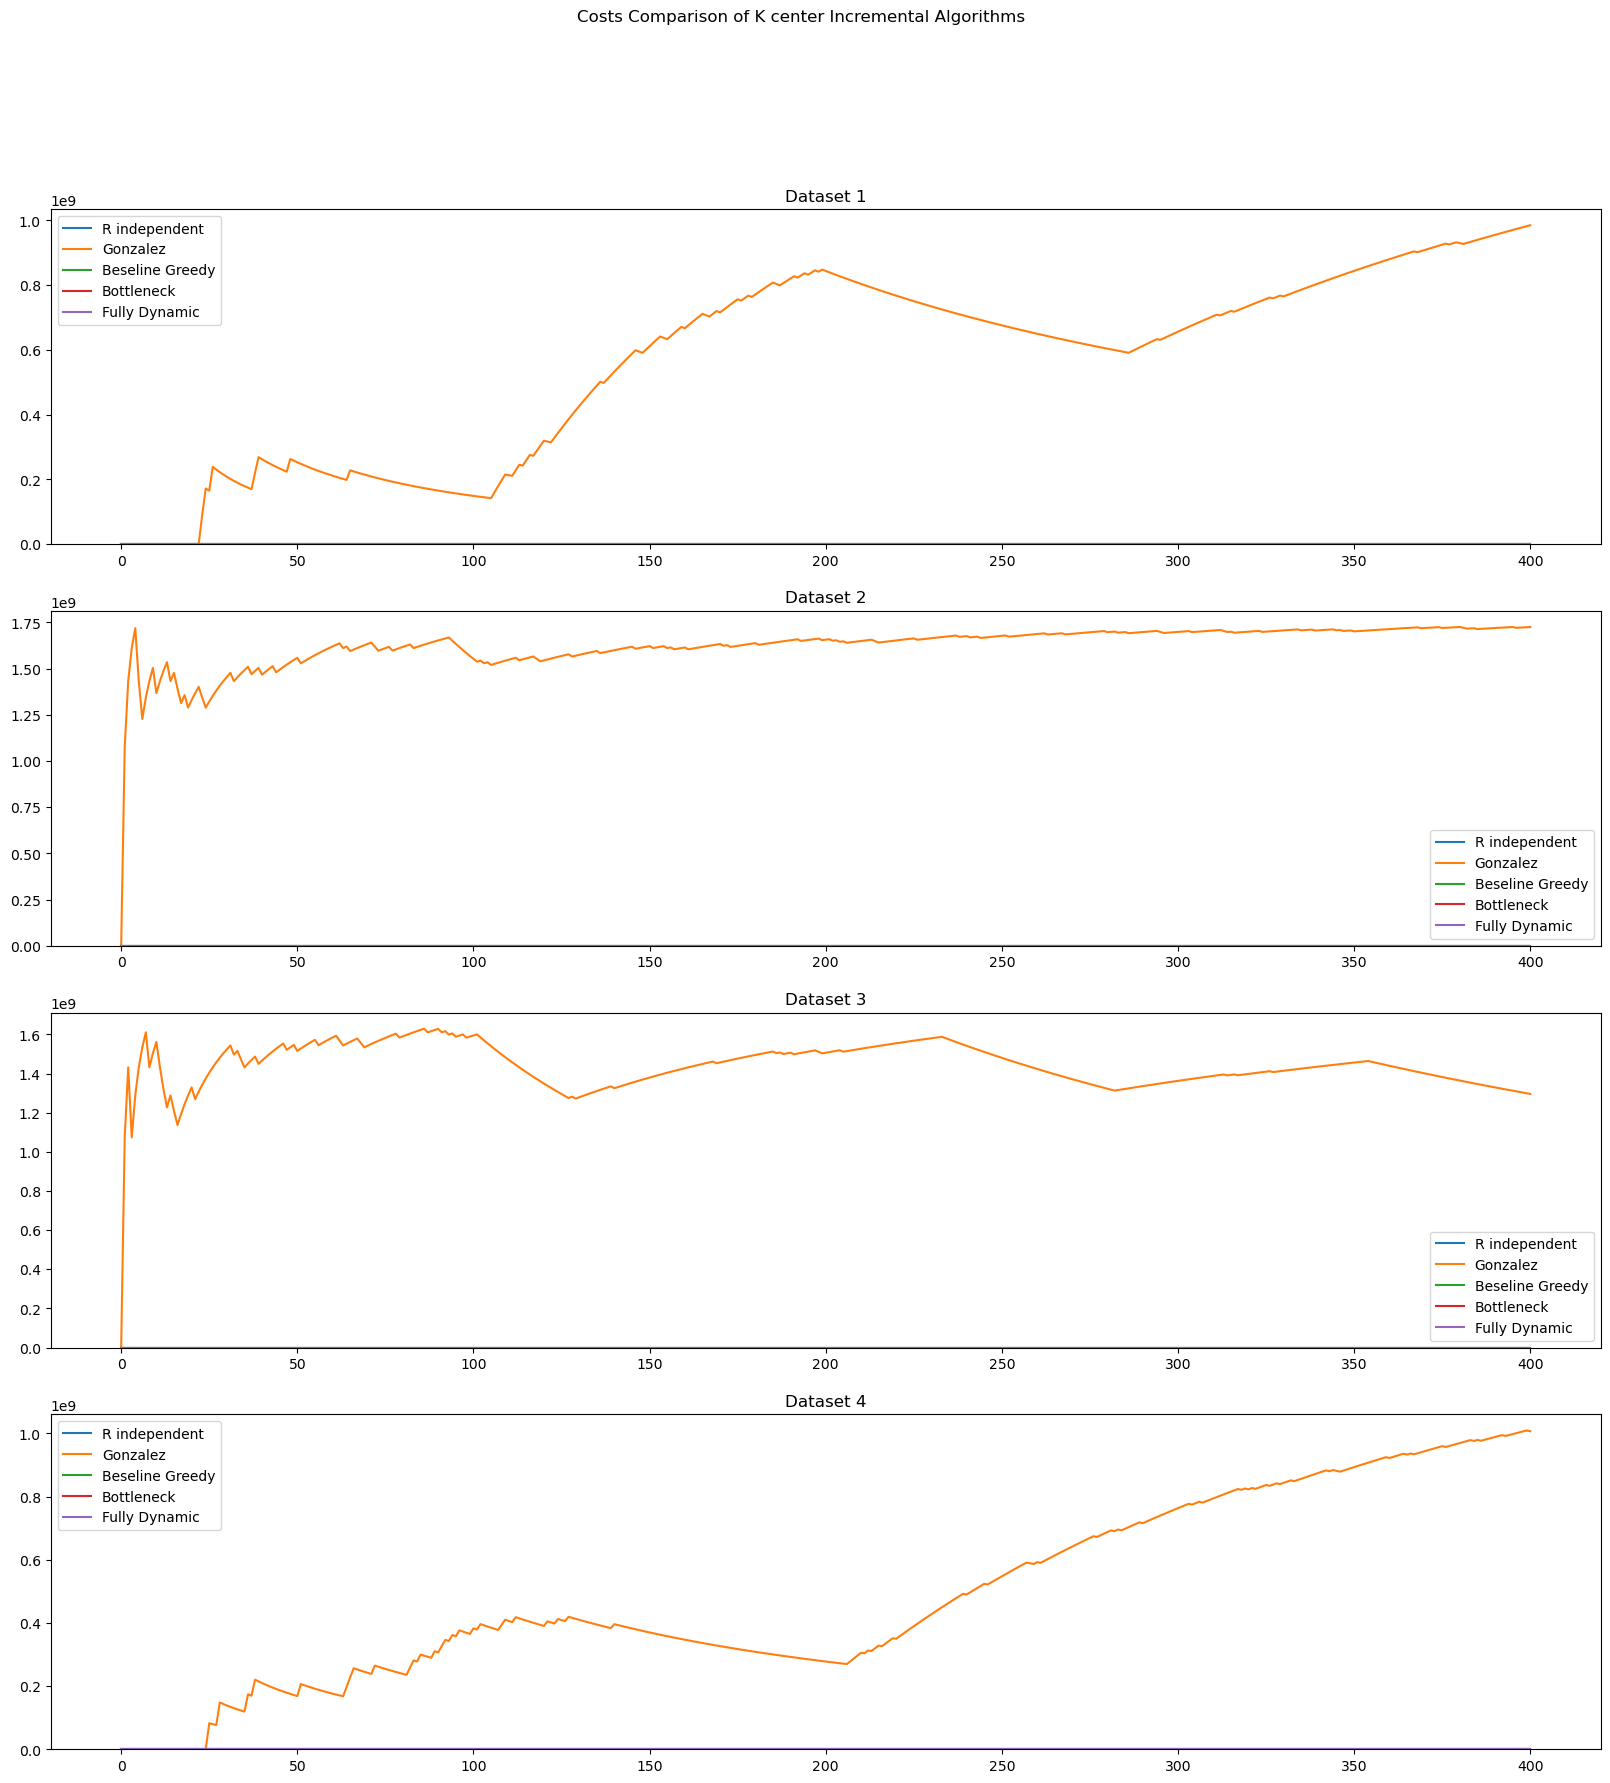

In [29]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 20))

for i, df in enumerate(dfs):
    axs[i].plot(df['mean_RIndependent'], label="R independent")
    axs[i].plot(df['mean_Gonzalez'], label="Gonzalez")
    axs[i].plot(df['mean_BaselineGreedy'], label="Beseline Greedy")
    axs[i].plot(df['mean_Bottleneck'], label="Bottleneck")
    axs[i].plot(df['mean_FullyDynamic'], label="Fully Dynamic")
    axs[i].set_title(f'Dataset {i+1}')
    axs[i].legend()
    axs[i].set_ylim(0)
    
fig.suptitle("Costs Comparison of K center Incremental Algorithms")
plt.show()

In [30]:
for i, df in enumerate(dfs):
    print('costs for dataset ', files[i][:12])
    print('RIndependent ', df['RIndependent'].mean())
    print('Gonzalez ', df['Gonzalez'].mean())
    print('BaselineGreedy', df['BaselineGreedy'].mean())
    print('Bottleneck ', df['Bottleneck'].mean())
    print('FullyDynamic ', df['FullyDynamic'].mean())

costs for dataset  ant-colony-4
RIndependent  11.950124688279303
Gonzalez  985379053.0249376
BaselineGreedy 12.58354114713217
Bottleneck  12.501246882793017
FullyDynamic  14.418952618453865
costs for dataset  ant-colony-5
RIndependent  17.48877805486284
Gonzalez  1724413314.9226933
BaselineGreedy 18.76558603491272
Bottleneck  17.987531172069826
FullyDynamic  20.935162094763093
costs for dataset  ant-colony-6
RIndependent  18.55361596009975
Gonzalez  1295987657.521197
BaselineGreedy 20.00498753117207
Bottleneck  19.06234413965087
FullyDynamic  22.855361596009974
costs for dataset  ant-colony-3
RIndependent  15.670822942643392
Gonzalez  1006800342.6433915
BaselineGreedy 17.042394014962593
Bottleneck  15.942643391521196
FullyDynamic  17.478802992518702
